In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [203]:
df = pd.read_csv('df_cleaned.csv')

In [204]:
df

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,...,cancelled,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,months
0,2018-08-20,UA,3656,"Raleigh/Durham, NC","Newark, NJ",1535,1533.0,-2.0,17.0,9.0,...,0.0,0.0,77.0,416.0,0.0,0.0,0.0,0.0,0.0,8
1,2018-08-20,UA,3723,"Denver, CO","Charlotte, NC",1000,955.0,-5.0,27.0,12.0,...,0.0,0.0,163.0,1337.0,0.0,0.0,0.0,0.0,0.0,8
2,2018-08-20,AA,4686,"Philadelphia, PA","Oklahoma City, OK",2115,2118.0,3.0,21.0,17.0,...,0.0,0.0,171.0,1261.0,0.0,0.0,0.0,0.0,0.0,8
3,2018-08-20,AA,4694,"Miami, FL","Key West, FL",2155,2149.0,-6.0,17.0,6.0,...,0.0,0.0,32.0,125.0,0.0,0.0,0.0,0.0,0.0,8
4,2018-08-20,AA,2366,"Chicago, IL","Atlanta, GA",1850,1856.0,6.0,23.0,6.0,...,0.0,0.0,92.0,606.0,0.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312788,2018-08-20,WN,1193,"Omaha, NE","Las Vegas, NV",1650,1642.0,-8.0,7.0,3.0,...,0.0,0.0,151.0,1099.0,0.0,0.0,0.0,0.0,0.0,8
312789,2018-08-20,WN,2299,"Ontario, CA","Denver, CO",635,635.0,0.0,8.0,8.0,...,0.0,0.0,104.0,819.0,0.0,0.0,0.0,0.0,0.0,8
312790,2018-08-20,WN,791,"Ontario, CA","Phoenix, AZ",2120,2117.0,-3.0,6.0,7.0,...,0.0,0.0,54.0,325.0,0.0,0.0,0.0,0.0,0.0,8
312791,2018-08-20,WN,1110,"Phoenix, AZ","Los Angeles, CA",1435,1435.0,0.0,36.0,5.0,...,0.0,0.0,53.0,370.0,0.0,0.0,0.0,0.0,0.0,8


In [4]:
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['delay_level'] = df['dep_delay'].apply(delay_type)

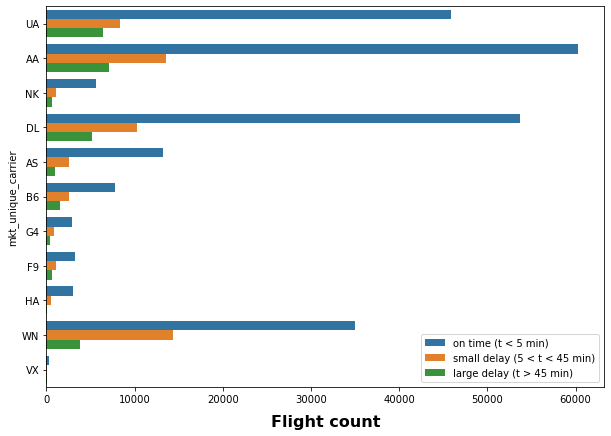

In [5]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="mkt_unique_carrier", hue='delay_level', data=df)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

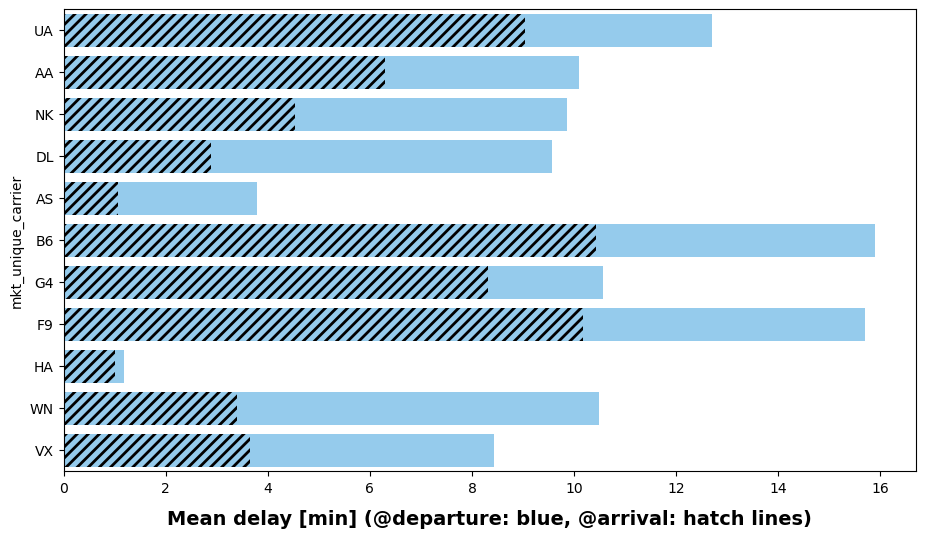

In [25]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="dep_delay", y="mkt_unique_carrier", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="arr_delay", y="mkt_unique_carrier", data=df, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
#labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
#ax.set_yticklabels(labels)
#ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

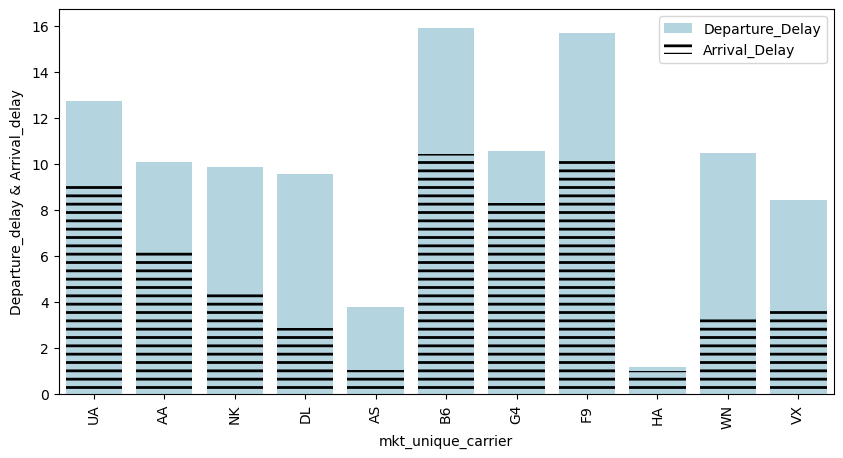

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(1, figsize=(10,5))
ax = sns.barplot(x='mkt_unique_carrier', y="dep_delay", data=df, color="lightblue", ci=None)
ax = sns.barplot(x="mkt_unique_carrier", y="arr_delay", data=df,  hatch = '--',alpha = 0.0, ci=None)
plt.ylabel('Departure_delay & Arrival_delay',fontsize=10, labelpad=5)
plt.xticks(rotation=90)

ax.legend(["Departure_Delay", "Arrival_Delay"],bbox_to_anchor=(1, 1))

In [205]:
from datetime import datetime
import calendar

In [206]:
df['fl_date'] = pd.to_datetime(df['fl_date'])

In [207]:
df['weekday'] = df['fl_date'].dt.weekday

In [208]:
df['day_of_month'] = df['fl_date'].dt.day

In [209]:
df['year'] = df['fl_date'].dt.year

In [210]:
df

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,months,weekday,day_of_month,year
0,2018-08-20,UA,3656,"Raleigh/Durham, NC","Newark, NJ",1535,1533.0,-2.0,17.0,9.0,...,416.0,0.0,0.0,0.0,0.0,0.0,8,0,20,2018
1,2018-08-20,UA,3723,"Denver, CO","Charlotte, NC",1000,955.0,-5.0,27.0,12.0,...,1337.0,0.0,0.0,0.0,0.0,0.0,8,0,20,2018
2,2018-08-20,AA,4686,"Philadelphia, PA","Oklahoma City, OK",2115,2118.0,3.0,21.0,17.0,...,1261.0,0.0,0.0,0.0,0.0,0.0,8,0,20,2018
3,2018-08-20,AA,4694,"Miami, FL","Key West, FL",2155,2149.0,-6.0,17.0,6.0,...,125.0,0.0,0.0,0.0,0.0,0.0,8,0,20,2018
4,2018-08-20,AA,2366,"Chicago, IL","Atlanta, GA",1850,1856.0,6.0,23.0,6.0,...,606.0,0.0,0.0,0.0,0.0,0.0,8,0,20,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312788,2018-08-20,WN,1193,"Omaha, NE","Las Vegas, NV",1650,1642.0,-8.0,7.0,3.0,...,1099.0,0.0,0.0,0.0,0.0,0.0,8,0,20,2018
312789,2018-08-20,WN,2299,"Ontario, CA","Denver, CO",635,635.0,0.0,8.0,8.0,...,819.0,0.0,0.0,0.0,0.0,0.0,8,0,20,2018
312790,2018-08-20,WN,791,"Ontario, CA","Phoenix, AZ",2120,2117.0,-3.0,6.0,7.0,...,325.0,0.0,0.0,0.0,0.0,0.0,8,0,20,2018
312791,2018-08-20,WN,1110,"Phoenix, AZ","Los Angeles, CA",1435,1435.0,0.0,36.0,5.0,...,370.0,0.0,0.0,0.0,0.0,0.0,8,0,20,2018


* Add montly average delay of carriers as a new column 

In [211]:
montlyDelayAvOfCarrier=df[['mkt_unique_carrier','year','months','arr_delay']].groupby(['mkt_unique_carrier','year','months']).mean()

In [212]:
df_mi = df.set_index(['mkt_unique_carrier' , 'year' , 'months'])

In [213]:
new_df=pd. merge(df_mi, montlyDelayAvOfCarrier, left_index=True, right_index=True)

In [214]:
new_df=new_df.reset_index()

In [215]:
new_df.rename({'arr_delay_y': 'MonthlyDelayCarrier'}, axis=1, inplace=True)

In [216]:
new_df

,mkt_unique_carrier,year,months,fl_date,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,...,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,weekday,day_of_month,MonthlyDelayCarrier
0,AA,2018,1,2018-01-01,5458,"Washington, DC","Greer, SC",1946,1945.0,-1.0,...,71.0,396.0,0.0,0.0,0.0,0.0,0.0,0,1,3.494772
1,AA,2018,1,2018-01-01,596,"Kansas City, MO","Phoenix, AZ",1805,1819.0,14.0,...,142.0,1044.0,0.0,0.0,0.0,0.0,0.0,0,1,3.494772
2,AA,2018,1,2018-01-01,599,"Dallas/Fort Worth, TX","Spokane, WA",855,853.0,-2.0,...,219.0,1477.0,0.0,0.0,0.0,0.0,0.0,0,1,3.494772
3,AA,2018,1,2018-01-01,600,"Fort Lauderdale, FL","Charlotte, NC",607,604.0,-3.0,...,91.0,632.0,0.0,0.0,0.0,0.0,0.0,0,1,3.494772
4,AA,2018,1,2018-01-01,638,"Pittsburgh, PA","Phoenix, AZ",700,654.0,-6.0,...,261.0,1814.0,0.0,0.0,16.0,0.0,0.0,0,1,3.494772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312788,WN,2019,12,2019-12-31,3046,"Houston, TX","Orlando, FL",1425,1429.0,4.0,...,96.0,849.0,0.0,0.0,0.0,0.0,0.0,1,31,4.373791
312789,WN,2019,12,2019-12-31,1376,"Houston, TX","Chicago, IL",1200,1207.0,7.0,...,118.0,937.0,0.0,0.0,0.0,0.0,0.0,1,31,4.373791
312790,WN,2019,12,2019-12-31,5712,"Houston, TX","San Diego, CA",1355,1507.0,72.0,...,187.0,1313.0,16.0,0.0,0.0,0.0,46.0,1,31,4.373791
312791,WN,2019,12,2019-12-31,6729,"Las Vegas, NV","Oakland, CA",1555,1621.0,26.0,...,65.0,407.0,0.0,0.0,0.0,0.0,0.0,1,31,4.373791


In [62]:
new_df.columns

Index(['mkt_unique_carrier', 'year', 'months', 'fl_date', 'mkt_carrier_fl_num',
       'origin_city_name', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time',
       'arr_delay_x', 'cancelled', 'diverted', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'delay_level', 'weekday', 'day_of_month',
       'MonthlyDelayCarrier'],
      dtype='object')

In [217]:
# create a list of our conditions
conditions = [
    (new_df['carrier_delay'] != 0),
    (new_df['weather_delay'] != 0),
    (new_df['nas_delay'] != 0),
    (new_df['security_delay'] != 0),
    (new_df['late_aircraft_delay'] != 0),
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4,5]

# create a new column and use np.select to assign values to it using our lists as arguments
new_df['delayReason'] = np.select(conditions, values)

# display updated DataFrame
new_df.head()


,mkt_unique_carrier,year,months,fl_date,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,weekday,day_of_month,MonthlyDelayCarrier,delayReason
0,AA,2018,1,2018-01-01,5458,"Washington, DC","Greer, SC",1946,1945.0,-1.0,...,396.0,0.0,0.0,0.0,0.0,0.0,0,1,3.494772,0
1,AA,2018,1,2018-01-01,596,"Kansas City, MO","Phoenix, AZ",1805,1819.0,14.0,...,1044.0,0.0,0.0,0.0,0.0,0.0,0,1,3.494772,0
2,AA,2018,1,2018-01-01,599,"Dallas/Fort Worth, TX","Spokane, WA",855,853.0,-2.0,...,1477.0,0.0,0.0,0.0,0.0,0.0,0,1,3.494772,0
3,AA,2018,1,2018-01-01,600,"Fort Lauderdale, FL","Charlotte, NC",607,604.0,-3.0,...,632.0,0.0,0.0,0.0,0.0,0.0,0,1,3.494772,0
4,AA,2018,1,2018-01-01,638,"Pittsburgh, PA","Phoenix, AZ",700,654.0,-6.0,...,1814.0,0.0,0.0,16.0,0.0,0.0,0,1,3.494772,3


In [218]:
new_df.rename({'mkt_unique_carrier': 'airline','months':'month','arr_delay_x':'arr_delay' }, axis=1, inplace=True)

In [219]:
new_df = new_df.drop(['mkt_carrier_fl_num','cancelled','diverted'],axis=1)

<AxesSubplot:>

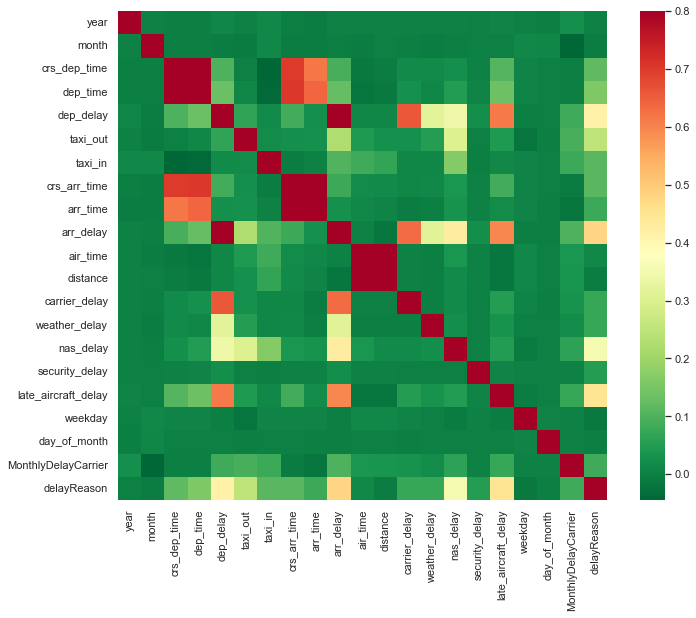

In [220]:
#correlation matrix
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

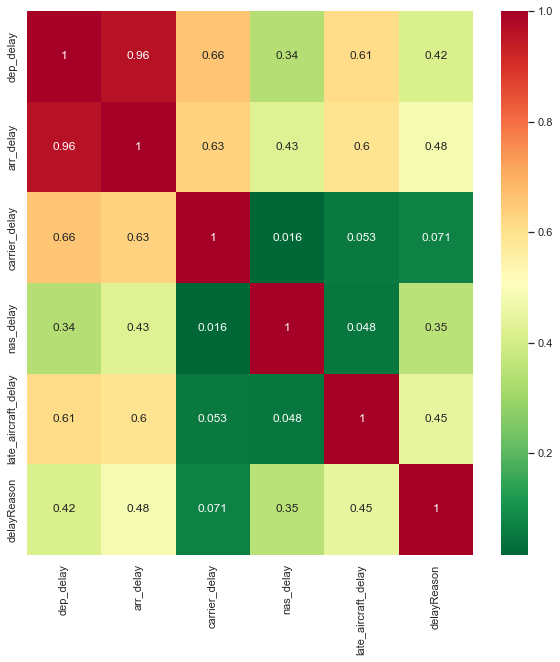

In [221]:
# most correlated features with arr_delay
corrmat = new_df.corr()
top_corr_features = corrmat.index[abs(corrmat["arr_delay"])>0.4]
plt.figure(figsize=(10,10))
g = sns.heatmap(new_df[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

In [222]:
df_model = new_df.drop(['dep_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay','fl_date'],axis=1)

In [223]:
df_model

,airline,year,month,origin_city_name,dest_city_name,crs_dep_time,dep_time,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,air_time,distance,weekday,day_of_month,MonthlyDelayCarrier,delayReason
0,AA,2018,1,"Washington, DC","Greer, SC",1946,1945.0,14.0,4.0,2120,2114.0,-6.0,71.0,396.0,0,1,3.494772,0
1,AA,2018,1,"Kansas City, MO","Phoenix, AZ",1805,1819.0,9.0,14.0,2004,2004.0,0.0,142.0,1044.0,0,1,3.494772,0
2,AA,2018,1,"Dallas/Fort Worth, TX","Spokane, WA",855,853.0,16.0,12.0,1058,1100.0,2.0,219.0,1477.0,0,1,3.494772,0
3,AA,2018,1,"Fort Lauderdale, FL","Charlotte, NC",607,604.0,15.0,6.0,810,756.0,-14.0,91.0,632.0,0,1,3.494772,0
4,AA,2018,1,"Pittsburgh, PA","Phoenix, AZ",700,654.0,24.0,47.0,1010,1026.0,16.0,261.0,1814.0,0,1,3.494772,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312788,WN,2019,12,"Houston, TX","Orlando, FL",1425,1429.0,9.0,9.0,1735,1723.0,-12.0,96.0,849.0,1,31,4.373791,0
312789,WN,2019,12,"Houston, TX","Chicago, IL",1200,1207.0,23.0,6.0,1430,1434.0,4.0,118.0,937.0,1,31,4.373791,0
312790,WN,2019,12,"Houston, TX","San Diego, CA",1355,1507.0,10.0,3.0,1525,1627.0,62.0,187.0,1313.0,1,31,4.373791,1
312791,WN,2019,12,"Las Vegas, NV","Oakland, CA",1555,1621.0,10.0,3.0,1730,1739.0,9.0,65.0,407.0,1,31,4.373791,0


In [224]:
cat_df = df_model.select_dtypes(include=['object']).copy()

In [225]:
cat_df

,airline,origin_city_name,dest_city_name
0,AA,"Washington, DC","Greer, SC"
1,AA,"Kansas City, MO","Phoenix, AZ"
2,AA,"Dallas/Fort Worth, TX","Spokane, WA"
3,AA,"Fort Lauderdale, FL","Charlotte, NC"
4,AA,"Pittsburgh, PA","Phoenix, AZ"
...,...,...,...
312788,WN,"Houston, TX","Orlando, FL"
312789,WN,"Houston, TX","Chicago, IL"
312790,WN,"Houston, TX","San Diego, CA"
312791,WN,"Las Vegas, NV","Oakland, CA"


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


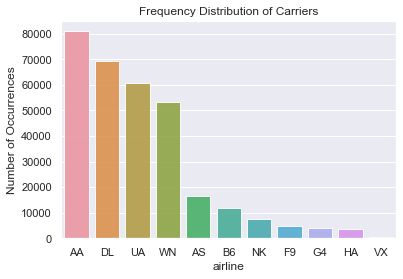

In [85]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df['airline'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('airline', fontsize=12)
plt.show()

* Encoding categorical values

In [94]:
## First method

In [87]:
cat_df_flights_lc = cat_df.copy()
cat_df_flights_lc['airline'] = cat_df_flights_lc['airline'].astype('category')
cat_df_flights_lc['origin_city_name'] = cat_df_flights_lc['origin_city_name'].astype('category')   
cat_df_flights_lc['dest_city_name'] = cat_df_flights_lc['dest_city_name'].astype('category') 

In [89]:
# we can encode a caterorical variable by using cat.codes. but first we need to change its type from object to category as you can see above line.
cat_df_flights_lc['airline'] = cat_df_flights_lc['airline'].cat.codes

In [90]:
cat_df_flights_lc

,airline,origin_city_name,dest_city_name
0,0,"Washington, DC","Greer, SC"
1,0,"Kansas City, MO","Phoenix, AZ"
2,0,"Dallas/Fort Worth, TX","Spokane, WA"
3,0,"Fort Lauderdale, FL","Charlotte, NC"
4,0,"Pittsburgh, PA","Phoenix, AZ"
...,...,...,...
312788,10,"Houston, TX","Orlando, FL"
312789,10,"Houston, TX","Chicago, IL"
312790,10,"Houston, TX","San Diego, CA"
312791,10,"Las Vegas, NV","Oakland, CA"


In [95]:
## second method

In [93]:
# or you can use label encoder in scikit learning
cat_df_flights_sklearn = cat_df.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['airline_code'] = lb_make.fit_transform(cat_df['airline'])

cat_df_flights_sklearn.head() #Results in appending a new column to df

,airline,origin_city_name,dest_city_name,airline_code
0,AA,"Washington, DC","Greer, SC",0
1,AA,"Kansas City, MO","Phoenix, AZ",0
2,AA,"Dallas/Fort Worth, TX","Spokane, WA",0
3,AA,"Fort Lauderdale, FL","Charlotte, NC",0
4,AA,"Pittsburgh, PA","Phoenix, AZ",0


In [226]:
# we use second method
df_model2 = df_model.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_model2['airline_code'] = lb_make.fit_transform(df_model['airline'])
df_model2['origin_code'] = lb_make.fit_transform(df_model['origin_city_name'])
df_model2['dest_code'] = lb_make.fit_transform(df_model['dest_city_name'])

df_model2.head() #Results in appending a new column to df

,airline,year,month,origin_city_name,dest_city_name,crs_dep_time,dep_time,taxi_out,taxi_in,crs_arr_time,...,arr_delay,air_time,distance,weekday,day_of_month,MonthlyDelayCarrier,delayReason,airline_code,origin_code,dest_code
0,AA,2018,1,"Washington, DC","Greer, SC",1946,1945.0,14.0,4.0,2120,...,-6.0,71.0,396.0,0,1,3.494772,0,0,348,127
1,AA,2018,1,"Kansas City, MO","Phoenix, AZ",1805,1819.0,9.0,14.0,2004,...,0.0,142.0,1044.0,0,1,3.494772,0,0,166,259
2,AA,2018,1,"Dallas/Fort Worth, TX","Spokane, WA",855,853.0,16.0,12.0,1058,...,2.0,219.0,1477.0,0,1,3.494772,0,0,79,319
3,AA,2018,1,"Fort Lauderdale, FL","Charlotte, NC",607,604.0,15.0,6.0,810,...,-14.0,91.0,632.0,0,1,3.494772,0,0,111,58
4,AA,2018,1,"Pittsburgh, PA","Phoenix, AZ",700,654.0,24.0,47.0,1010,...,16.0,261.0,1814.0,0,1,3.494772,3,0,261,259


In [227]:
df_model2.columns

Index(['airline', 'year', 'month', 'origin_city_name', 'dest_city_name',
       'crs_dep_time', 'dep_time', 'taxi_out', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'air_time', 'distance', 'weekday',
       'day_of_month', 'MonthlyDelayCarrier', 'delayReason', 'airline_code',
       'origin_code', 'dest_code'],
      dtype='object')

In [228]:
model_df=df_model2.drop(['airline','origin_city_name','dest_city_name'],axis=1)

In [229]:
model_df

,year,month,crs_dep_time,dep_time,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,air_time,distance,weekday,day_of_month,MonthlyDelayCarrier,delayReason,airline_code,origin_code,dest_code
0,2018,1,1946,1945.0,14.0,4.0,2120,2114.0,-6.0,71.0,396.0,0,1,3.494772,0,0,348,127
1,2018,1,1805,1819.0,9.0,14.0,2004,2004.0,0.0,142.0,1044.0,0,1,3.494772,0,0,166,259
2,2018,1,855,853.0,16.0,12.0,1058,1100.0,2.0,219.0,1477.0,0,1,3.494772,0,0,79,319
3,2018,1,607,604.0,15.0,6.0,810,756.0,-14.0,91.0,632.0,0,1,3.494772,0,0,111,58
4,2018,1,700,654.0,24.0,47.0,1010,1026.0,16.0,261.0,1814.0,0,1,3.494772,3,0,261,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312788,2019,12,1425,1429.0,9.0,9.0,1735,1723.0,-12.0,96.0,849.0,1,31,4.373791,0,10,147,247
312789,2019,12,1200,1207.0,23.0,6.0,1430,1434.0,4.0,118.0,937.0,1,31,4.373791,0,10,147,62
312790,2019,12,1355,1507.0,10.0,3.0,1525,1627.0,62.0,187.0,1313.0,1,31,4.373791,1,10,147,297
312791,2019,12,1555,1621.0,10.0,3.0,1730,1739.0,9.0,65.0,407.0,1,31,4.373791,0,10,184,241


<AxesSubplot:>

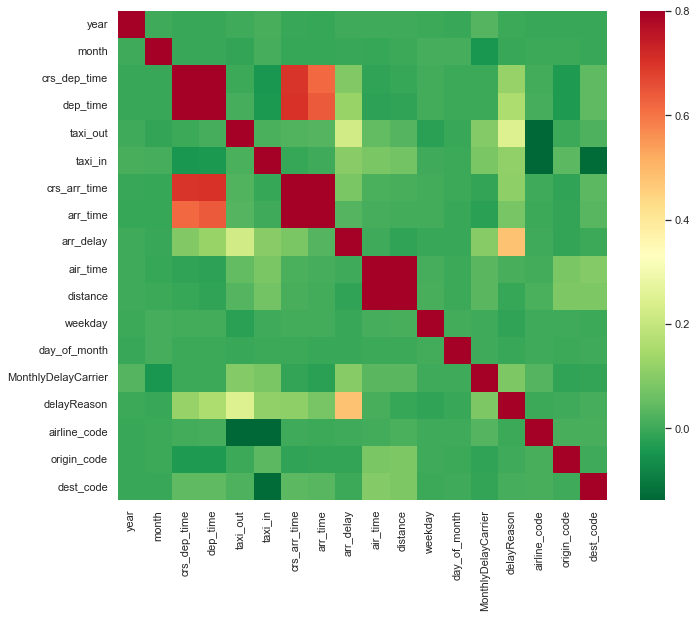

In [230]:
#correlation matrix
corrmat = model_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

In [117]:
model_df.columns

Index(['year', 'month', 'crs_dep_time', 'dep_time', 'taxi_out', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'air_time', 'distance',
       'delay_level', 'weekday', 'day_of_month', 'MonthlyDelayCarrier',
       'airline_code', 'origin_code', 'dest_code'],
      dtype='object')

In [126]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(model_df, alpha=0.2, figsize=(6, 6), diagonal='kde')

<AxesSubplot:xlabel='month', ylabel='arr_delay'>

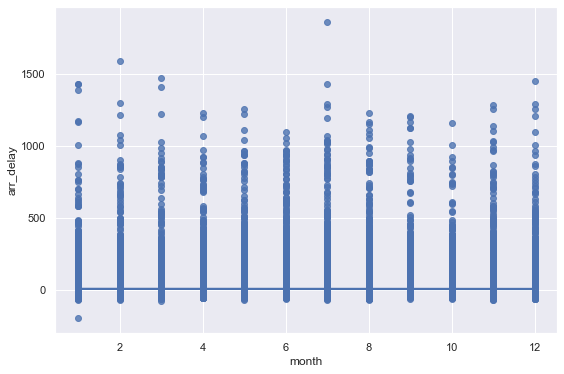

In [120]:
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(model_df['month']), y=model_df['arr_delay'], data=model_df, order=1)

<AxesSubplot:xlabel='weekday', ylabel='arr_delay'>

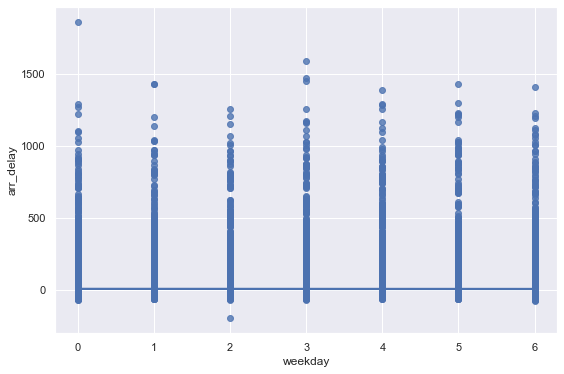

In [122]:
 f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(model_df['weekday']), y=model_df['arr_delay'], data=model_df, order=1)

<AxesSubplot:xlabel='taxi_out', ylabel='arr_delay'>

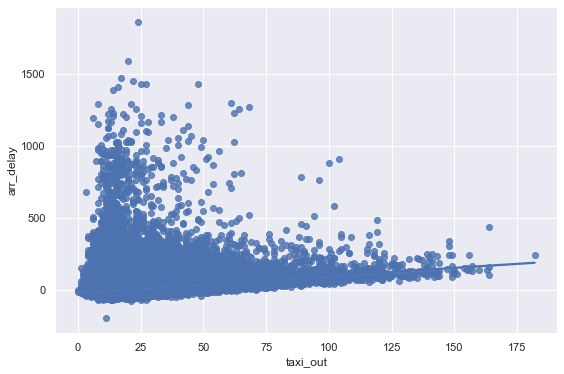

In [129]:
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(model_df['taxi_out']), y=model_df['arr_delay'], data=model_df, order=1)

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\Owner\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='taxi_out', ylabel='arr_delay'>

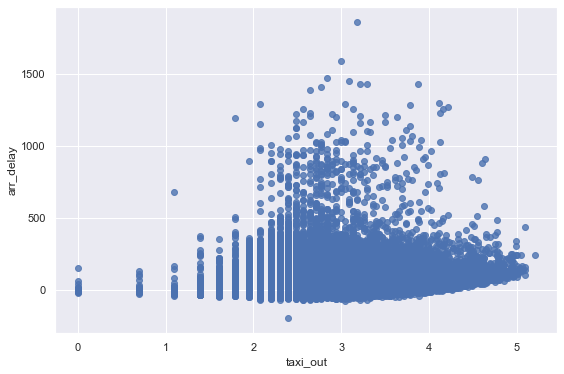

In [131]:
import numpy as np
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(np.log(model_df['taxi_out'])), y=model_df['arr_delay'], data=model_df, order=1)

<AxesSubplot:xlabel='taxi_in', ylabel='arr_delay'>

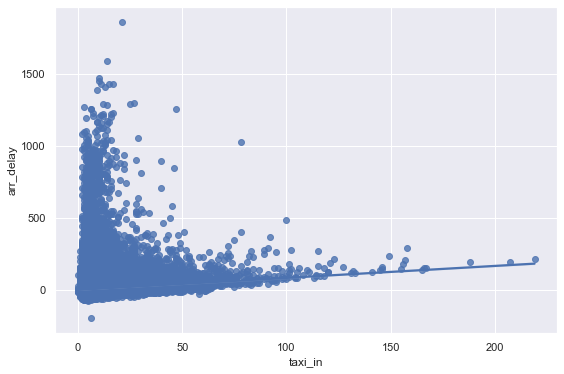

In [132]:
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(model_df['taxi_in']), y=model_df['arr_delay'], data=model_df, order=1)

<AxesSubplot:xlabel='MonthlyDelayCarrier', ylabel='arr_delay'>

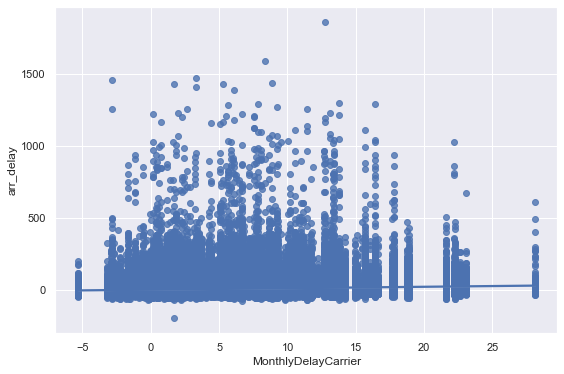

In [133]:
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(model_df['MonthlyDelayCarrier']), y=model_df['arr_delay'], data=model_df, order=1)

* Removing Features With Small Variance

year and delay level has gone

In [ ]:
#####left it  ###################

In [187]:
model_df.columns

Index(['year', 'month', 'crs_dep_time', 'dep_time', 'taxi_out', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'air_time', 'distance',
       'delay_level', 'weekday', 'day_of_month', 'MonthlyDelayCarrier',
       'airline_code', 'origin_code', 'dest_code'],
      dtype='object')

In [189]:
varData = model_df[['taxi_out','taxi_in','air_time','distance','MonthlyDelayCarrier','arr_delay']]
varData

,taxi_out,taxi_in,air_time,distance,MonthlyDelayCarrier,arr_delay
0,14.0,4.0,71.0,396.0,3.494772,-6.0
1,9.0,14.0,142.0,1044.0,3.494772,0.0
2,16.0,12.0,219.0,1477.0,3.494772,2.0
3,15.0,6.0,91.0,632.0,3.494772,-14.0
4,24.0,47.0,261.0,1814.0,3.494772,16.0
...,...,...,...,...,...,...
312788,9.0,9.0,96.0,849.0,4.373791,-12.0
312789,23.0,6.0,118.0,937.0,4.373791,4.0
312790,10.0,3.0,187.0,1313.0,4.373791,62.0
312791,10.0,3.0,65.0,407.0,4.373791,9.0


In [190]:
#data must be numerical and normalized 
def low_variance_filter(data,threshold):
    
    from sklearn.preprocessing import normalize
    
    normalize = normalize(data)
    
    data_scaled = pd.DataFrame(normalize)
    
    variance = data_scaled.var()
    columns = data.columns
    
    variable = [ ]
    for i in range(0,len(variance)):
        if variance[i]>=threshold: #setting the threshold as 1%
            variable.append(columns[i])
    
    new_data = data[variable]
    
    return new_data

In [195]:
low_variance_filter(varData, 0.0005)

,taxi_out,air_time,distance,arr_delay
0,14.0,71.0,396.0,-6.0
1,9.0,142.0,1044.0,0.0
2,16.0,219.0,1477.0,2.0
3,15.0,91.0,632.0,-14.0
4,24.0,261.0,1814.0,16.0
...,...,...,...,...
312788,9.0,96.0,849.0,-12.0
312789,23.0,118.0,937.0,4.0
312790,10.0,187.0,1313.0,62.0
312791,10.0,65.0,407.0,9.0


In [ ]:
##################################################

In [231]:
model_df

,year,month,crs_dep_time,dep_time,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,air_time,distance,weekday,day_of_month,MonthlyDelayCarrier,delayReason,airline_code,origin_code,dest_code
0,2018,1,1946,1945.0,14.0,4.0,2120,2114.0,-6.0,71.0,396.0,0,1,3.494772,0,0,348,127
1,2018,1,1805,1819.0,9.0,14.0,2004,2004.0,0.0,142.0,1044.0,0,1,3.494772,0,0,166,259
2,2018,1,855,853.0,16.0,12.0,1058,1100.0,2.0,219.0,1477.0,0,1,3.494772,0,0,79,319
3,2018,1,607,604.0,15.0,6.0,810,756.0,-14.0,91.0,632.0,0,1,3.494772,0,0,111,58
4,2018,1,700,654.0,24.0,47.0,1010,1026.0,16.0,261.0,1814.0,0,1,3.494772,3,0,261,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312788,2019,12,1425,1429.0,9.0,9.0,1735,1723.0,-12.0,96.0,849.0,1,31,4.373791,0,10,147,247
312789,2019,12,1200,1207.0,23.0,6.0,1430,1434.0,4.0,118.0,937.0,1,31,4.373791,0,10,147,62
312790,2019,12,1355,1507.0,10.0,3.0,1525,1627.0,62.0,187.0,1313.0,1,31,4.373791,1,10,147,297
312791,2019,12,1555,1621.0,10.0,3.0,1730,1739.0,9.0,65.0,407.0,1,31,4.373791,0,10,184,241


In [232]:
model_df.to_csv (r'C:\Users\Owner\Mid-Term Project\mid-term-project-I-master\model_df.csv', index = False, header=True)

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance


In [236]:
X = model_df.drop('arr_delay', 1)
y = model_df['arr_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

C:\Users\Owner\AppData\Local\Temp/ipykernel_8128/629265957.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = model_df.drop('arr_delay', 1)


In [237]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [250]:
rf.feature_importances_

array([0.00114238, 0.00409227, 0.12091773, 0.11111827, 0.01434093,
       0.00925862, 0.19190169, 0.10663974, 0.0096182 , 0.01005173,
       0.0036754 , 0.00645415, 0.00601624, 0.38037188, 0.0082406 ,
       0.00944648, 0.00671369])

In [259]:
feature_names = list(set(model_df.columns) - {'arr_delay'})

Text(0.5, 0, 'Random Forest Feature Importance')

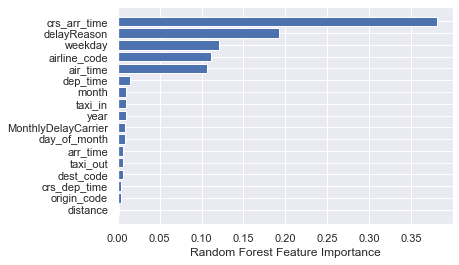

In [261]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_names, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")